[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/10_dentmax_hierarchical_clustering.ipynb)

# Capitolo 5: Dentmax, Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
!wget "https://github.com/LeoLin72/IULM_DDM2324_Notebooks/raw/main/data/Capitolo5e6-DentMax.xlsx"
# Read the data
df = pd.read_excel("Capitolo5e6-DentMax.xlsx")

# Display the first few rows of the dataframe
df.head()


--2024-04-09 13:36:58--  https://github.com/LeoLin72/IULM_DDM2324_Notebooks/raw/main/data/Capitolo5e6-DentMax.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LeoLin72/IULM_DDM2324_Notebooks/main/data/Capitolo5e6-DentMax.xlsx [following]
--2024-04-09 13:36:59--  https://raw.githubusercontent.com/LeoLin72/IULM_DDM2324_Notebooks/main/data/Capitolo5e6-DentMax.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198329 (194K) [application/octet-stream]
Saving to: ‘Capitolo5e6-DentMax.xlsx’

Capitolo5e6-DentMax 100%[===================>] 193.68K  --.-KB/s    in 0.04s   

2024-04-09 13:36:59 (5.40

,Observations / Segmentation Variables,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Integration,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers
0,Respondent 1,12,22,150,32,21,3,4,1,5,5,5,6,7,5,5,4,5,6
1,Respondent 2,13,22,150,32,20,3,4,1,5,5,5,7,7,5,5,4,5,5
2,Respondent 3,12,21,150,32,22,3,4,1,5,5,5,6,7,5,5,4,6,6
3,Respondent 4,11,21,150,33,21,3,4,1,5,5,5,6,7,4,5,4,5,5
4,Respondent 5,12,21,150,32,21,3,4,1,5,5,5,7,7,5,4,4,5,6


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Observations / Segmentation Variables  2300 non-null   object
 1   Time Spent at DentMax Booth            2300 non-null   int64 
 2   Time Spent at DentMed/OxyMax Booth     2300 non-null   int64 
 3   Total Time spent at show               2300 non-null   int64 
 4   % Buying from DentMax in the past      2300 non-null   int64 
 5   Historical Sales Index                 2300 non-null   int64 
 6   Sales Frequency                        2300 non-null   int64 
 7   Length of Relationship                 2300 non-null   int64 
 8   Number of Referrals Offered            2300 non-null   int64 
 9   Importance of Image Quality            2300 non-null   int64 
 10  Importance of Diagnostic Flexibility   2300 non-null   int64 
 11  Importance of Sof

In [3]:
df.describe()

,Time Spent at DentMax Booth,Time Spent at DentMed/OxyMax Booth,Total Time spent at show,% Buying from DentMax in the past,Historical Sales Index,Sales Frequency,Length of Relationship,Number of Referrals Offered,Importance of Image Quality,Importance of Diagnostic Flexibility,Importance of Software Integration,Importance of Technical Assistance,Importance of Price,Trust in TV ads,Trust in Radio Ads,Trust in Internet Ads,Trust in Dental Magazine Ads,Trust in Peers
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,20.237826,32.433913,138.923478,38.606957,32.860435,3.298261,6.420435,2.142609,5.257826,5.179565,5.000870,6.134348,6.408696,4.533913,4.364348,4.236522,5.352609,5.940870
std,13.996379,24.603166,38.743412,25.769014,21.341852,1.440632,2.332929,3.728569,0.849765,0.853017,0.798541,0.495954,0.904733,0.506742,0.560664,1.020310,0.832421,0.695464
min,5.000000,10.000000,59.000000,5.000000,8.000000,0.000000,4.000000,0.000000,3.000000,3.000000,4.000000,5.000000,4.000000,3.000000,3.000000,2.000000,4.000000,5.000000
25%,12.000000,21.000000,130.000000,32.000000,21.000000,3.000000,4.000000,0.000000,5.000000,5.000000,4.000000,6.000000,6.000000,4.000000,4.000000,4.000000,5.000000,5.000000
50%,12.000000,21.000000,150.000000,32.000000,21.000000,3.000000,8.000000,1.000000,5.000000,5.000000,5.000000,6.000000,7.000000,5.000000,4.000000,4.000000,5.000000,6.000000
75%,36.000000,26.000000,151.000000,45.000000,58.000000,4.000000,9.000000,2.000000,6.000000,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,4.000000,6.000000,6.000000
max,46.000000,79.000000,182.000000,101.000000,65.000000,6.000000,9.000000,12.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000


Standardizzazione delle variabili

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])
df_scaled

array([[-0.58869639, -0.42418045,  0.2859565 , ..., -0.23186409,
        -0.42368625,  0.08504147],
       [-0.5172338 , -0.42418045,  0.2859565 , ..., -0.23186409,
        -0.42368625, -1.35315983],
       [-0.58869639, -0.46483447,  0.2859565 , ..., -0.23186409,
         0.77789004,  0.08504147],
       ...,
       [ 1.05494318,  1.85244436,  1.06045007, ...,  1.72875138,
         0.77789004,  1.52324276],
       [-0.58869639, -0.46483447,  0.2859565 , ..., -0.23186409,
        -0.42368625,  0.08504147],
       [-0.58869639, -0.46483447,  0.2859565 , ..., -0.23186409,
        -0.42368625, -1.35315983]])

In [5]:
# Clustering gerarchico
Z = linkage(df_scaled, method='ward', metric='euclidean')

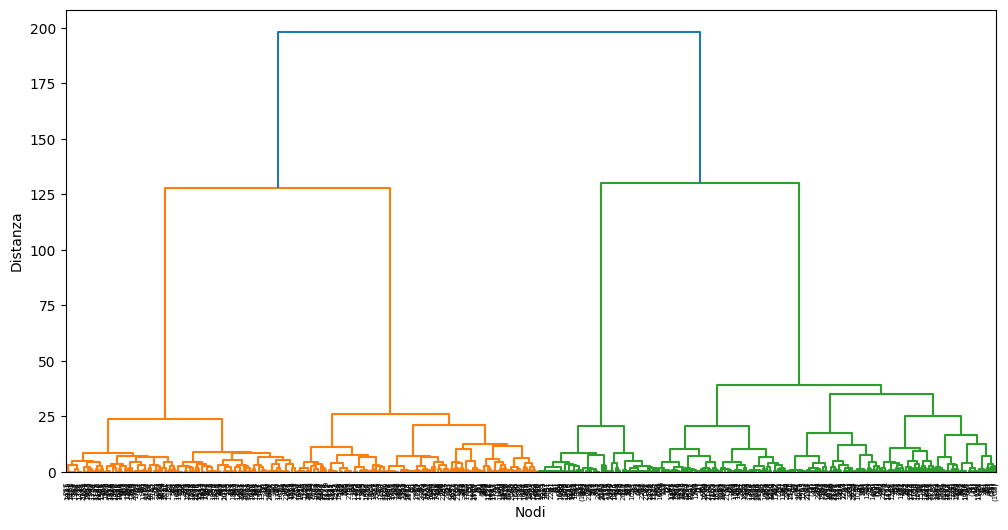

In [6]:
# Visualizza il dendrogramma
plt.figure(figsize=(12, 6))
dendrogram(Z, p=10, truncate_mode='level')
plt.xlabel('Nodi')
plt.ylabel('Distanza')
plt.show()

# Decisione dell'altezza di "taglio"

Dopo aver esaminato il dendrogramma, é possibile valre quali e quanti gruppi tenere. Anche se é difficile trovare l'altezza giusta dal grafico precedente, é possibile comunque chiedere al programma quanti cluster rimangono dopo aver "tagliato" il dendrogramma a una certa altezza. Proviamo con 75, per ottenere 4 cluster

In [7]:
threshold = 75

In [8]:
# Effettua il clustering in base all'altezza di taglio scelta
clusters = fcluster(Z, t=threshold, criterion='distance')
np.unique(clusters)

array([1, 2, 3, 4], dtype=int32)

75 pare un'altezza corretta e rileviamo 4 cluster (la variabile contiene gli ID ordinati, uno per osservazione)

In [9]:
clusters

array([4, 4, 4, ..., 2, 4, 4], dtype=int32)

Aggiungiamo la colonna con l'ID del cluster al cluster originale, e non a quello normalizzato.
In tal modo abbiamo operato su dati normalizzati, ma interpreteremo dati sulle loro scale reali

In [10]:
# Aggiungi la colonna dei cluster al DataFrame originale (non a quello normalizzato, in tal modo )
df['Cluster'] = clusters

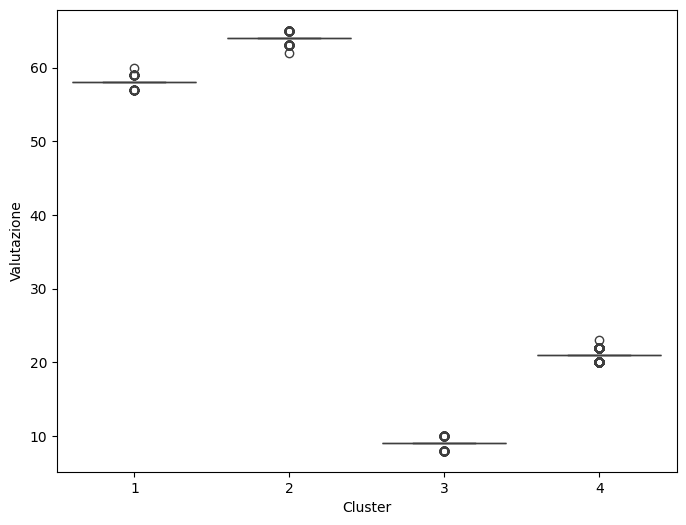

In [11]:
# Visualizza le differenze tra i cluster mediante boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Historical Sales Index', data=df)
plt.xlabel('Cluster')
plt.ylabel('Valutazione')
plt.show()


## Proporzione per cluster

In [14]:
cluster_counts = df['Cluster'].value_counts()
proportions = cluster_counts / df.shape[0]

print(proportions)

Cluster
4    0.49
2    0.22
3    0.17
1    0.12
Name: count, dtype: float64


In [19]:
# Calculate centroids for each cluster
df = df.apply(pd.to_numeric, errors='coerce')

cluster_centroids = df.groupby('Cluster').mean().reset_index()
print(cluster_centroids)



   Cluster  Observations / Segmentation Variables  \
0        1                                    NaN   
1        2                                    NaN   
2        3                                    NaN   
3        4                                    NaN   

   Time Spent at DentMax Booth  Time Spent at DentMed/OxyMax Booth  \
0                    45.003623                           25.971014   
1                    35.994071                           78.027668   
2                     6.038363                           10.979540   
3                    12.024845                           20.989352   

   Total Time spent at show  % Buying from DentMax in the past  \
0                130.003623                          99.974638   
1                180.023715                          45.057312   
2                 60.015345                           5.971867   
3                150.031056                          32.004437   

   Historical Sales Index  Sales Frequency  Length o

## Trasposizione dei cluster per visualizzazione tabella

In [35]:

# Calculate centroids for each cluster
cluster_centroids = cluster_centroids.round(2)

# Transpose the matrix
cluster_centroids_transposed = cluster_centroids.transpose()

# Correct the column headers after transposition
cluster_centroids_transposed.columns = cluster_centroids_transposed.iloc[0]
cluster_centroids_transposed = cluster_centroids_transposed.drop('Cluster')
cluster_centroids_transposed



Cluster,1.0,2.0,3.0,4.0
Observations / Segmentation Variables,NaN,NaN,NaN,NaN
Time Spent at DentMax Booth,45.00,35.99,6.04,12.02
Time Spent at DentMed/OxyMax Booth,25.97,78.03,10.98,20.99
Total Time spent at show,130.00,180.02,60.02,150.03
% Buying from DentMax in the past,99.97,45.06,5.97,32.00
Historical Sales Index,58.02,64.00,9.02,20.99
Sales Frequency,5.99,4.27,0.99,3.01
Length of Relationship,8.01,8.98,8.75,4.07
Number of Referrals Offered,12.00,2.07,0.00,0.50
Importance of Image Quality,6.74,6.01,3.98,5.00


In [36]:
cluster_centroids_transposed.to_csv('cluster_centroids_transposed.csv')

## Visualizzazione con PCA

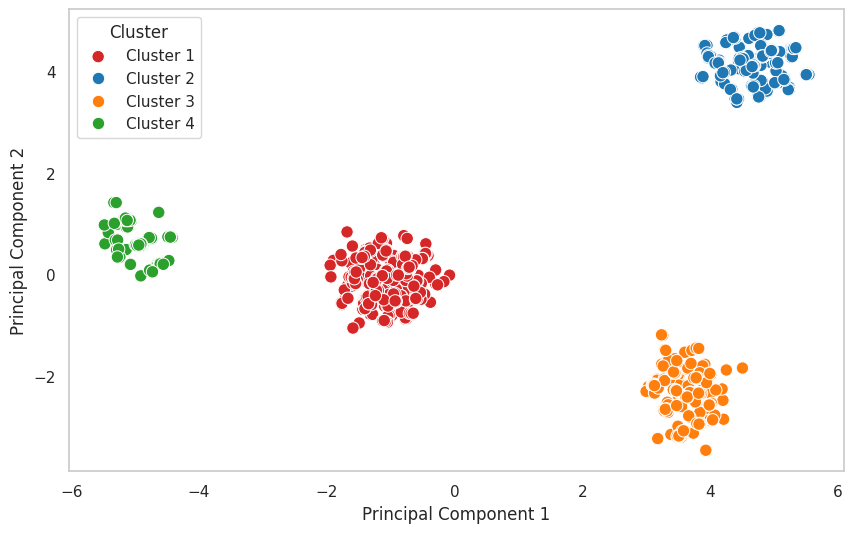

In [37]:
import seaborn as sns

from sklearn.decomposition import PCA

# Esegui PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a scatter plot of the PCA results with colors based on cluster ID
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='tab10', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best', labels=['Cluster ' + str(i) for i in range(1, len(np.unique(clusters)) + 1)])
plt.grid(False)
plt.show()